## Proyecto Series de Tiempo Univariadas (Árboles)
El siguiente Script abarca la modelación de la tasa de desempleo en Colombia; desde enero de 2001 hasta diciembre de 2023; utilizando árboles de decisión.

## Integrantes: Anderson Guarín, Ander Cristancho, Juan Duitama
## Librerías utilizadas

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn
import statsmodels.api as sm
from pandas import DataFrame
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

## Importación base de datos

In [2]:
import os
#Directorio Yo
#os.chdir("D:\Estadística\Semestres\Semestre 9\Series de Tiempo Univariadas\Datos")
#Directorio Ander
os.chdir(r"C:\Users\EQUIPO\OneDrive\Documentos\Documentos Ander\UNAL\Series de tiempo\Mis series y descriptiva")
os.getcwd()

'C:\\Users\\EQUIPO\\OneDrive\\Documentos\\Documentos Ander\\UNAL\\Series de tiempo\\Mis series y descriptiva'

In [3]:
Data = pd.read_excel("Desempleo.xlsx",skiprows=5,nrows=277)
Data = Data.iloc[:,[0,2]]
print(Data.dtypes)
# Cambiar los nombres de las columnas
nuevos_nombres = ['AnioMes', 'TasaDesempleo']
Data.columns = nuevos_nombres
Data

Año-Mes (AAAA-MM)         object
Tasa de desempleo (%)    float64
dtype: object


AnioMes  TasaDesempleo
0    2023-12      10.013717
1    2023-11       9.007386
2    2023-10       9.230912
3    2023-09       9.252674
4    2023-08       9.277372
..       ...            ...
271  2001-05      14.035800
272  2001-04      14.515100
273  2001-03      15.811900
274  2001-02      17.434200
275  2001-01      16.622300

[276 rows x 2 columns]

In [4]:
#Primera observación de los datos
Data['AnioMes']=pd.to_datetime(Data['AnioMes'])#Convirtiendo la columna año y mes a formato fecha
Desempleo1=Data.set_index('AnioMes')#Ordenando el dataframe, pero creo uno nuevo para volverlo objeto de series de tiempo luego
print(type(Desempleo1))
#Convirtiendo el data frame en objeto serie de tiempo
DesempleoTS=Desempleo1['TasaDesempleo']

<class 'pandas.core.frame.DataFrame'>


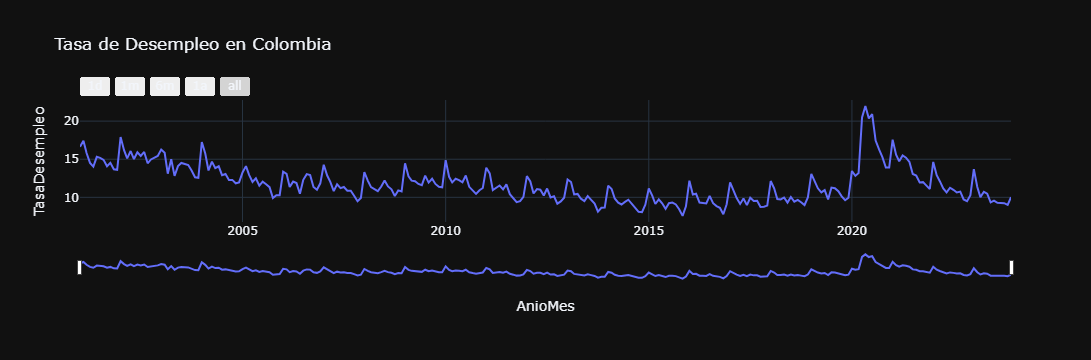

In [5]:
#Haciendo un gráfico interactivo ahora
# Crea un gráfico de líneas
fig = px.line(DesempleoTS, y="TasaDesempleo",title="Tasa de Desempleo en Colombia",template='plotly_dark')#Se le puede quitar el modo oscuro si quiere
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

In [6]:
DifeDesempleo=DesempleoTS.iloc[::-1].diff(periods=1)
DifeDesempleo

AnioMes
2001-01-01         NaN
2001-02-01    0.811900
2001-03-01   -1.622300
2001-04-01   -1.296800
2001-05-01   -0.479300
                ...   
2023-08-01   -0.295479
2023-09-01   -0.024698
2023-10-01   -0.021762
2023-11-01   -0.223526
2023-12-01    1.006331
Name: TasaDesempleo, Length: 276, dtype: float64

# Modelamiento utilizando árboles de decisión
En primer lugar modelaremos la serie con la tendencia extraída y luego con la serie original.
La serie con tendencia extraída de mejor comportamiento es aquella que se le aplicó la diferenciación ordinaria.

In [7]:
DifeDesempleo
DifeDesempleo_DF = pd.DataFrame(DifeDesempleo.values,index=pd.date_range(start='2001-01-01', end='2023-12-01', freq='MS') )
DifeDesempleo_DF = DifeDesempleo_DF.iloc[1:]#Me deshago de la primera fila que no tiene observación
DifeDesempleo_DF

0
2001-02-01  0.811900
2001-03-01 -1.622300
2001-04-01 -1.296800
2001-05-01 -0.479300
2001-06-01  1.276500
...              ...
2023-08-01 -0.295479
2023-09-01 -0.024698
2023-10-01 -0.021762
2023-11-01 -0.223526
2023-12-01  1.006331

[275 rows x 1 columns]



## Creación manual de los inputs y outputs

### Inputs

In [8]:
from pandas import DataFrame
df1 = DataFrame()#Creando un DataFrame vacío para luego llenar
for i in range(12,0,-1):
    df1[['t-'+str(i)]] = DifeDesempleo_DF.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo, y al hacer
    
#for i in range(6,1,-1):   
 #   df1[['t-'+str(i)]] = DifeDesempleo_DF.shift(i)

df1

t-12      t-11      t-10       t-9       t-8       t-7  \
2001-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2001-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
2001-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2001-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2001-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-08-01 -0.357647  0.117162 -1.027408 -0.220272  0.771921  3.431681   
2023-09-01  0.117162 -1.027408 -0.220272  0.771921  3.431681 -2.351234   
2023-10-01 -1.027408 -0.220272  0.771921  3.431681 -2.351234 -1.320582   
2023-11-01 -0.220272  0.771921  3.431681 -2.351234 -1.320582  0.692157   
2023-12-01  0.771921  3.431681 -2.351234 -1.320582  0.692157 -0.249600   

                 t-6       t-5       t-4       t-3       t-2       t-1  
2001-02-01       NaN       NaN       NaN       NaN       NaN       NaN  
2001-03-01       NaN       NaN       NaN       NaN       NaN  0.811900  
2001-04-01       NaN       NaN       NaN       NaN  0.811900 -1.622300  
2001-05-01       NaN       NaN       NaN  0.811900 -1.622300 -1.296800  
2001-06-01       NaN       NaN  0.811900 -1.622300 -1.296800 -0.479300  
...              ...       ...       ...       ...       ...       ...  
2023-08-01 -2.351234 -1.320582  0.692157 -0.249600 -1.132790  0.230541  
2023-09-01 -1.320582  0.692157 -0.249600 -1.132790  0.230541 -0.295479  
2023-10-01  0.692157 -0.249600 -1.132790  0.230541 -0.295479 -0.024698  
2023-11-01 -0.249600 -1.132790  0.230541 -0.295479 -0.024698 -0.021762  
2023-12-01 -1.132790  0.230541 -0.295479 -0.024698 -0.021762 -0.223526  

[275 rows x 12 columns]

### Outputs (Haremos la predicción un paso adelante)

In [9]:
df1['t'] = DifeDesempleo_DF.values
print(df1.head(13))

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
2001-02-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001-03-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001-04-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001-05-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001-06-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001-07-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN  0.8119   
2001-08-01     NaN     NaN     NaN     NaN     NaN     NaN  0.8119 -1.6223   
2001-09-01     NaN     NaN     NaN     NaN     NaN  0.8119 -1.6223 -1.2968   
2001-10-01     NaN     NaN     NaN     NaN  0.8119 -1.6223 -1.2968 -0.4793   
2001-11-01     NaN     NaN     NaN  0.8119 -1.6223 -1.2968 -0.4793  1.2765   
2001-12-01     NaN     NaN  0.8119 -1.6223 -1.2968 -0.4793  1.2765 -0.1285   
2002-01-01     NaN  0.8119 -1.6223 -1.2968 -0.4793  1.2765 -0.12

Remuevo las primeras 12 observaciones

In [10]:
df1_qpro = df1[12:]
print(df1_qpro)
df1_qpro.size

                t-12      t-11      t-10       t-9       t-8       t-7  \
2002-02-01  0.811900 -1.622300 -1.296800 -0.479300  1.276500 -0.128500   
2002-03-01 -1.622300 -1.296800 -0.479300  1.276500 -0.128500 -0.270300   
2002-04-01 -1.296800 -0.479300  1.276500 -0.128500 -0.270300 -0.839400   
2002-05-01 -0.479300  1.276500 -0.128500 -0.270300 -0.839400  0.450800   
2002-06-01  1.276500 -0.128500 -0.270300 -0.839400  0.450800 -0.842700   
...              ...       ...       ...       ...       ...       ...   
2023-08-01 -0.357647  0.117162 -1.027408 -0.220272  0.771921  3.431681   
2023-09-01  0.117162 -1.027408 -0.220272  0.771921  3.431681 -2.351234   
2023-10-01 -1.027408 -0.220272  0.771921  3.431681 -2.351234 -1.320582   
2023-11-01 -0.220272  0.771921  3.431681 -2.351234 -1.320582  0.692157   
2023-12-01  0.771921  3.431681 -2.351234 -1.320582  0.692157 -0.249600   

                 t-6       t-5       t-4       t-3       t-2       t-1  \
2002-02-01 -0.270300 -0.839400  0.450

3419

Tengo 263 datos

## División de los datos

In [11]:
Desempleosplit = df1_qpro.values #Convirtiendo en NumpyArray
X1= Desempleosplit[:, 0:-1]#Selecciono todas las filas, y todas las columnas excepto la última que es la variable respuesta
y1 =Desempleosplit[:,-1] #Selecciono todas las filas y solo la última columna

Tamaños de los conjuntos de entrenamiento, validación y prueba

In [12]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70)+1#No da entero, le pongo ese dato de más al entrenamiento
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 263
185 26 52
Train + Validation + Test: 263


Creando los conjuntos de datos (variable respuesta)

In [13]:
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

Creando los conjuntos de datos (variables explicativas)

In [14]:
trainfeature_size = int(len(X1) * 0.70)+1
valfeature_size = int(len(X1) * 0.10)# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 263
Training Observations for Feature: 185
Validation Observations for Feature: 26
Test Observations for Feature: 52


## Creación del árbol
Recordemos que en este caso no se está especificando la profundidad del árbol, por lo que adoptará la profundidad máxima, es decir, sobreajuste.

In [15]:
# Create a decision tree regression model with default arguments
decision_tree_Desempleo = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Desempleo.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Desempleo.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_Desempleo.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el ECM sobre validación es:",(((decision_tree_Desempleo.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.49578658982108503
el ECM sobre validación es: 0.6447331580885887


Explorando diferentes profundidades

In [16]:
for d in [2,3,4,5,6,7,8,9,10,11,12]:
    # Create the tree and fit it
    decision_tree_Desempleo = DecisionTreeRegressor(max_depth=d)
    decision_tree_Desempleo.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Desempleo.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Desempleo.score(val_feature, val_target))  # You want the test score to be positive and high
    print("el ECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_Desempleo.predict(val_feature),val_target),'\n')

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6281680661530078
Coeficiente R2 sobre el conjunto de validación: 0.5011930131871496
el ECM sobre el conjunto de validación es: 0.6378200130979986 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7089908474855358
Coeficiente R2 sobre el conjunto de validación: 0.47894117576751805
el ECM sobre el conjunto de validación es: 0.6662732377112476 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7867870959534007
Coeficiente R2 sobre el conjunto de validación: 0.5656319595800425
el ECM sobre el conjunto de validación es: 0.5554225112206704 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8546857023831738
Coeficiente R2 sobre el conjunto de validación: 0.5568378798966848
el ECM sobre el conjunto de validación es: 0.5666674219118044 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8953403580123457
Coeficiente R2 sobre el conjunto de validación: 0.5723329704

## Modelo completo(Juntando entrenamiento y validación)

In [17]:
###Unión de ambos conjuntos
train_val_feature=np.concatenate((train_feature,val_feature),axis=0)#Tengo ahora 211 datos, los 185 de entrenamiento y 26 de validación
train_val_target=np.concatenate((train_target,val_target),axis=0)#Lo mismo acá pero esta es una sola columna
print(train_val_feature.shape)
print(train_val_target.shape)

(211, 12)
(211,)


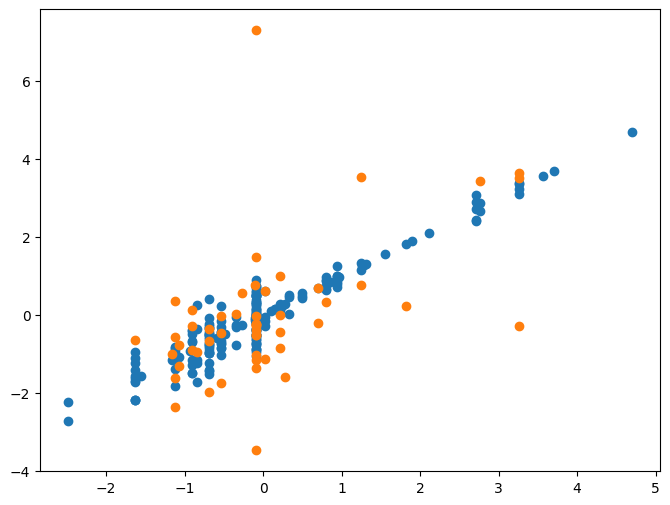

Error cuadrático medio Entrenamiento: 0.13965717566658764
Error cuadrático medio Prueba: 2.202181466216136


In [18]:
# Usando la profundidad 6

decision_tree_Desempleo = DecisionTreeRegressor(max_depth=6)  #Creando el árbol con la profundidad anteriormente seleccionada - 6
decision_tree_Desempleo.fit(train_val_feature, train_val_target) #Entrenando el árbol

# Predicción de entrenamiento y test
train_val_prediction = decision_tree_Desempleo.predict(train_val_feature)
test_prediction = decision_tree_Desempleo.predict(test_feature)

# Gráfico de las predicciones vs los verdaderos(lo ideal sería una recta y=x)
plt.figure(figsize=(8, 6))
plt.scatter(train_val_prediction, train_val_target, label='train')  # Azul, indican la predicción vs el verdadero valor, pero del entrenamiento
plt.scatter(test_prediction, test_target, label='test')  # Naranja, , indican la predicción vs el verdadero valor, pero del test
plt.show()
print("Error cuadrático medio Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target))

print("Error cuadrático medio Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target))

In [19]:
print(train_val_prediction.size)#Tamaño de las predicciones del conjunto de entrenamiento
print(train_val_target.size)

print(test_prediction.size)#Tamaño de las predicciones del conjunto de test
print(test_target.size)

211
211
52
52


In [20]:
indicetrian_val_test=df1_qpro.index #Seleccionando los índices
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:211]#Seleccionando los índices del entrenamiento y validación
indicetest=indicetrian_val_test[211:263]#Seleccionando los índices del test

263


In [21]:
print(indicetrain_val.size)
print(indicetest.size)

211
52


In [22]:
targetjoint=np.concatenate((train_val_target,test_target))#Uniendo los verdaderos valores entrenamiento-validación con el test
predictionjoint=np.concatenate((train_val_prediction,test_prediction))#Uniendo las presicciones de entrenamiento-validación con test
print(targetjoint.size)
print(predictionjoint.size)

263
263


In [23]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)#Recordemos que eliminamos las 12 primeras observaciones porque habían NA cuando organizamos los datos

observado  Predicción
2002-02-01    -1.7211   -0.842128
2002-03-01    -1.0774   -1.077400
2002-04-01     0.9656    0.965600
2002-05-01    -1.0549   -0.089268
2002-06-01     0.8889    0.797350
2002-07-01    -0.4849   -0.484900
2002-08-01     0.5266   -0.089268
2002-09-01    -1.4872   -0.899409
2002-10-01     0.5071   -0.089268
2002-11-01     0.2167   -0.538875

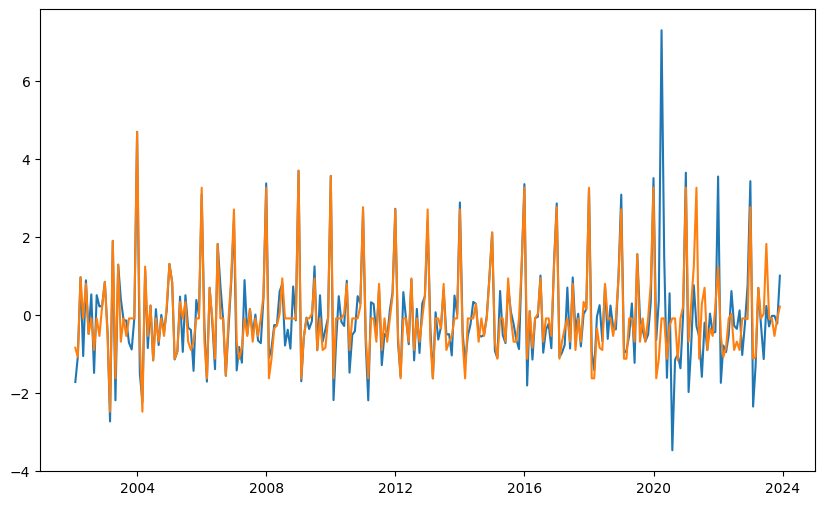

In [24]:
#Gráfico simple de lo observado y lo predicho
plt.figure(figsize=(10, 6))
plt.plot(ObsvsPred)

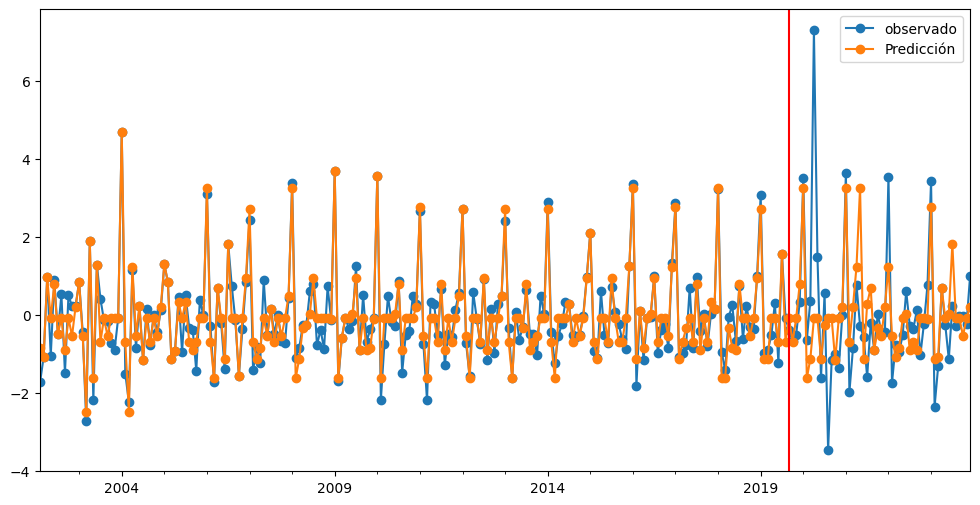

In [25]:
ax = ObsvsPred.plot( marker="o", figsize=(12,6))
ax.axvline(x=indicetrian_val_test[211].date(),color='red')

Comparación de las predicciones

In [26]:
#Haciendo como ejercicio la operación inversa de la diferencia ordinaria con mi serie original
serie_original_recuperada = DifeDesempleo.cumsum()
serie_original_recuperada = serie_original_recuperada.add(DesempleoTS.iloc[::-1].iloc[0], fill_value=0)
DesempleoTS.iloc[::-1]

AnioMes
2001-01-01    16.622300
2001-02-01    17.434200
2001-03-01    15.811900
2001-04-01    14.515100
2001-05-01    14.035800
                ...    
2023-08-01     9.277372
2023-09-01     9.252674
2023-10-01     9.230912
2023-11-01     9.007386
2023-12-01    10.013717
Name: TasaDesempleo, Length: 276, dtype: float64

In [27]:
#Voy a hacer la evaluación de la predicción del testeo, lo que requiero hacer entonces es juntar las observaciones reales antes del periodo de testeo y juntar el testeo

Flipo=pd.Series(np.concatenate([DifeDesempleo.values[:224],test_prediction]))
Flipo   

0           NaN
1      0.811900
2     -1.622300
3     -1.296800
4     -0.479300
         ...   
271   -0.089268
272   -0.089268
273   -0.538875
274   -0.089268
275    0.214200
Length: 276, dtype: float64

In [28]:
#Primero junto las observaciones de enero de 2001 hasta enero de 2002 de la serie diferenciada con las predicciones
#InverArbol1 = pd.Series(np.concatenate([DifeDesempleo.values[:13],predictionjoint]), index=pd.date_range('2001-01-01', periods=276, freq='MS',normalize=True)) #Este está mal porque lo que hace es la predicción de toda la serie, es decir, también del entrenamiento
InverArbol1 = pd.Series(pd.Series(np.concatenate([DifeDesempleo.values[:224],test_prediction]), index=pd.date_range('2001-01-01', periods=276, freq='MS',normalize=True)))#Este en cambio solo lo hace con los datos originales y luego le pone las predicciones del test unicamente
#Haciendo la operación inversa de la diferenciación ordinaria con las predicciones del árbol
InverArbol1 = InverArbol1.cumsum()
InverArbol1 = InverArbol1.add(DesempleoTS.iloc[::-1].iloc[0],fill_value=0)
InverArbol1

2001-01-01    16.622300
2001-02-01    17.434200
2001-03-01    15.811900
2001-04-01    14.515100
2001-05-01    14.035800
                ...    
2023-08-01    13.322774
2023-09-01    13.233506
2023-10-01    12.694632
2023-11-01    12.605364
2023-12-01    12.819564
Freq: MS, Length: 276, dtype: float64

In [29]:
InverArbol1
DesempleoTS.iloc[::-1]

AnioMes
2001-01-01    16.622300
2001-02-01    17.434200
2001-03-01    15.811900
2001-04-01    14.515100
2001-05-01    14.035800
                ...    
2023-08-01     9.277372
2023-09-01     9.252674
2023-10-01     9.230912
2023-11-01     9.007386
2023-12-01    10.013717
Name: TasaDesempleo, Length: 276, dtype: float64

Finalmente el gráfico comparando la serie de tiempo original con las predicciones hechas por el modelamiento con árboles, recordemos que las predicciones son hechas únicamente para febrero de 2002 en adelante

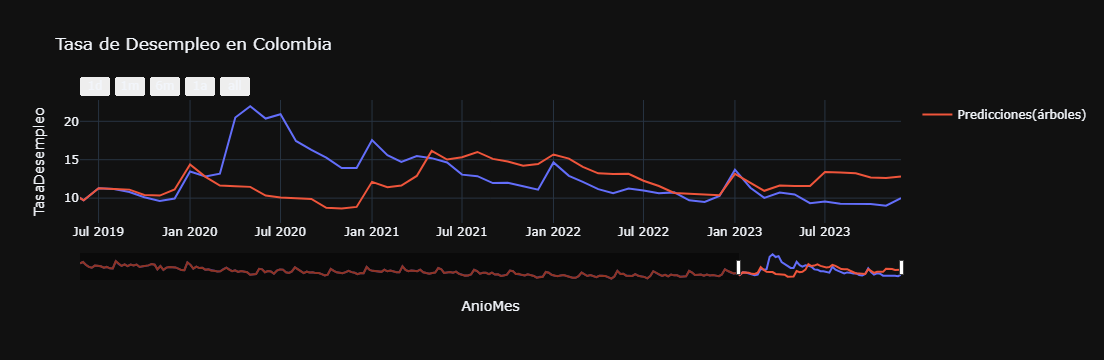

In [30]:
fig = px.line(DesempleoTS, y="TasaDesempleo", title="Tasa de Desempleo en Colombia", template='plotly_dark')  # Se le puede quitar el modo oscuro si quiere
fig.add_trace(go.Scatter(x=InverArbol1.index, y=InverArbol1, mode='lines', name='Predicciones(árboles)'))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

El error cuadrático medio de estas predicciones es

In [31]:
sklearn.metrics.mean_squared_error(InverArbol1[-52:].values, DesempleoTS[:52][::-1].values)
((InverArbol1[-52:].values-DesempleoTS[:52][::-1].values)**2).mean()#Manualmente

16.113302499199364

## Modelando la serie original en lugar de la serie con tendencia extraída
Haremos nuevamente la disposición de los datos con la serie original

In [32]:
NuevaConf = pd.DataFrame(Data['TasaDesempleo'].iloc[::-1].values,index=pd.date_range(start='2001-01-01', end='2023-12-01', freq='MS') )
from pandas import DataFrame
df2 = DataFrame()#Creando un DataFrame vacío para luego llenar
for i in range(12,0,-1):
    df2[['t-'+str(i)]] = NuevaConf.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo
    
#for i in range(6,1,-1):   
 #   df2[['t-'+str(i)]] = NuevaConf.shift(i)
df2['t'] = NuevaConf.values
df2 = df2[12:]
print(df2.head(10))

               t-12     t-11     t-10      t-9      t-8      t-7      t-6  \
2002-01-01  16.6223  17.4342  15.8119  14.5151  14.0358  15.3123  15.1838   
2002-02-01  17.4342  15.8119  14.5151  14.0358  15.3123  15.1838  14.9135   
2002-03-01  15.8119  14.5151  14.0358  15.3123  15.1838  14.9135  14.0741   
2002-04-01  14.5151  14.0358  15.3123  15.1838  14.9135  14.0741  14.5249   
2002-05-01  14.0358  15.3123  15.1838  14.9135  14.0741  14.5249  13.6822   
2002-06-01  15.3123  15.1838  14.9135  14.0741  14.5249  13.6822  13.6084   
2002-07-01  15.1838  14.9135  14.0741  14.5249  13.6822  13.6084  17.9099   
2002-08-01  14.9135  14.0741  14.5249  13.6822  13.6084  17.9099  16.1888   
2002-09-01  14.0741  14.5249  13.6822  13.6084  17.9099  16.1888  15.1114   
2002-10-01  14.5249  13.6822  13.6084  17.9099  16.1888  15.1114  16.0770   

                t-5      t-4      t-3      t-2      t-1        t  
2002-01-01  14.9135  14.0741  14.5249  13.6822  13.6084  17.9099  
2002-02-01  14.074

División entrenamiento y prueba

In [33]:
Split2 = df2.values #Convirtiendo en NumpyArray
X1_2= Split2[:, 0:-1] #Selecciono todas las filas, y todas las columnas excepto la última que es la variable respuesta
y1_2 =Split2[:,-1] #Selecciono todas las filas y solo la última columna

In [34]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1_2,y1_2,test_size=0.2, train_size=0.8,shuffle=False)

División del entrenamiento en entrenamiento y validación (los porcentajes los seleccioné así para que quede similar a los porcentajes 70,10,20 del modelo de árboles)

In [35]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.12, train_size=0.88,shuffle=False)

Creamos el árbol nuevamente sin especificar la profundidad, por defecto se realizará un sobreajuste

In [36]:
# Create a decision tree regression model with default arguments
decision_tree_Desempleo2 = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Desempleo2.fit(X_train, y_train)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Desempleo2.score(X_train, y_train))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_Desempleo2.score(X_val,y_val))  # predictions are horrible if negative value, no relationship if 0
print("el ECM sobre validación es:",(((decision_tree_Desempleo2.predict(X_val)-y_val)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.5619274301576949
el ECM sobre validación es: 0.5422298889241468


Exploramos diferentes profundidades y evaluamos la raíz del Error Cuadrático Medio

In [37]:
for d in [2,3,4,5,6,7,8,9,10,11,12]:
    # Create the tree and fit it
    decision_tree_Desempleo2 = DecisionTreeRegressor(max_depth=d)
    decision_tree_Desempleo2.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Desempleo2.score(X_train, y_train))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Desempleo2.score(X_val, y_val) )  # You want the test score to be positive and high
    print("el ECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_Desempleo2.predict(X_val),y_val),'\n')

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7675936826197453
Coeficiente R2 sobre el conjunto de validación: 0.469556935618873
el ECM sobre el conjunto de validación es: 0.6565626420834773 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8411854198335701
Coeficiente R2 sobre el conjunto de validación: 0.33515647972908846
el ECM sobre el conjunto de validación es: 0.8229185138850513 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.902391184296353
Coeficiente R2 sobre el conjunto de validación: 0.39629550177486106
el ECM sobre el conjunto de validación es: 0.7472429125919964 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9420570737316344
Coeficiente R2 sobre el conjunto de validación: 0.5175232887177674
el ECM sobre el conjunto de validación es: 0.5971916791348673 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.966562902372444
Coeficiente R2 sobre el conjunto de validación: 0.586259303024

Obtuvimos una profundidad distinta esta vez respecto a la primera parte, por lo que haremos dos árboles, uno con la profundidad que acabamos de obtener y otro con la profundidad de la primera parte.

## Hacemos los árboles con las dos profundidades

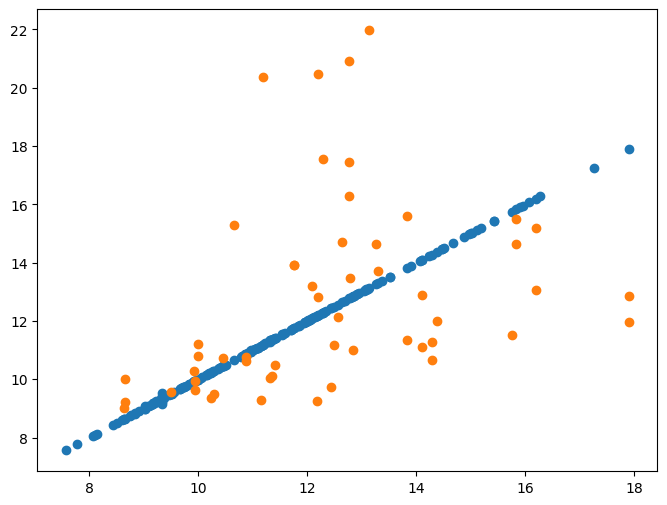

Error cuadrático medio Entrenamiento: 0.0005270853508289805
Error cuadrático medio Prueba: 10.799456131456788


In [38]:
# Usando la profundidad 12

decision_tree_Desempleo2 = DecisionTreeRegressor(max_depth=12)  #Creando el árbol con la profundidad 12
decision_tree_Desempleo2.fit(X_train_full, y_train_full) #Entrenando el árbol

# Predicción de entrenamiento y test
train_val_prediction2 = decision_tree_Desempleo2.predict(X_train_full)
test_prediction2 = decision_tree_Desempleo2.predict(X_test)

# Gráfico de las predicciones vs los verdaderos(lo ideal sería una recta y=x)
plt.figure(figsize=(8, 6))
plt.scatter(train_val_prediction2, y_train_full, label='train')  # Azul, indican la predicción vs el verdadero valor, pero del entrenamiento
plt.scatter(test_prediction2, y_test, label='test')  # Naranja, , indican la predicción vs el verdadero valor, pero del test
plt.show()
print("Error cuadrático medio Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction2, y_train_full))

print("Error cuadrático medio Prueba:",sklearn.metrics.mean_squared_error(test_prediction2, y_test))

264
264
264


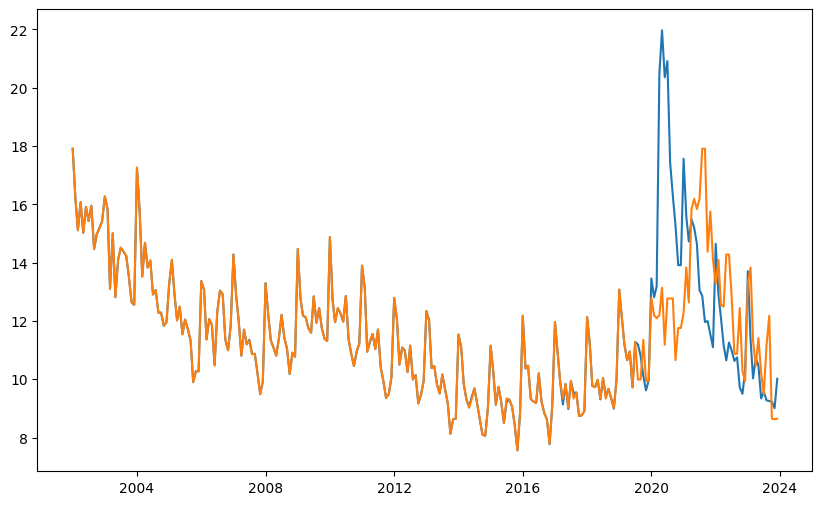

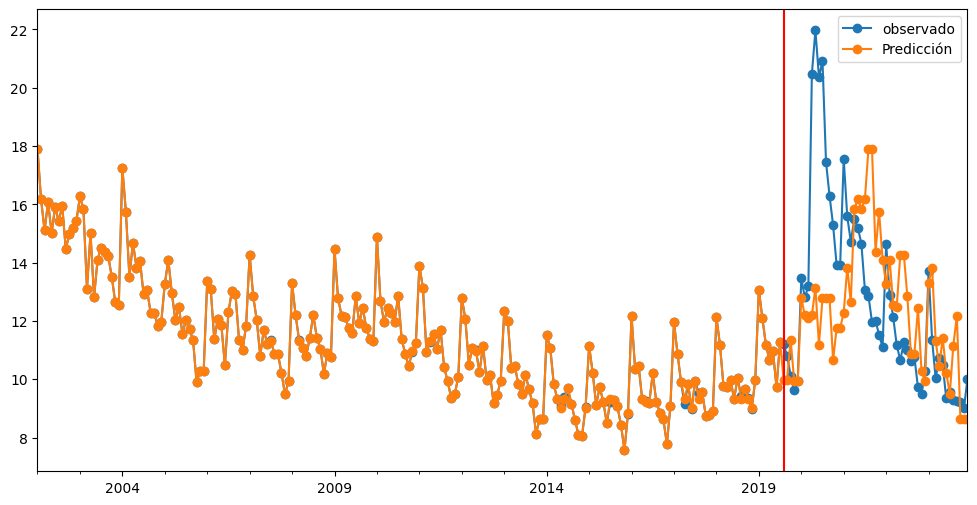

In [39]:
indicetrian_val_test2=df2.index #Seleccionando los índices
print(indicetrian_val_test2.size)
indicetrain_val2=indicetrian_val_test2[0:211]#Seleccionando los índices del entrenamiento y validación
indicetest2=indicetrian_val_test2[211:264]#Seleccionando los índices del test

targetjoint2=np.concatenate((y_train_full,y_test))#Uniendo los verdaderos valores entrenamiento-validación con el test
predictionjoint2=np.concatenate((train_val_prediction2,test_prediction2))#Uniendo las presicciones de entrenamiento-validación con test
print(targetjoint2.size)
print(predictionjoint2.size)
d2 = {'observado': targetjoint2, 'Predicción': predictionjoint2}
ObsvsPred2=pd.DataFrame(data=d2,index=indicetrian_val_test2)
ObsvsPred2.head(10)#Recordemos que eliminamos las 12 primeras observaciones porque habían NA cuando organizamos los datos
#Gráfico simple de lo observado y lo predicho
plt.figure(figsize=(10, 6))
plt.plot(ObsvsPred2)
ax = ObsvsPred2.plot( marker="o", figsize=(12,6))
ax.axvline(x=indicetrian_val_test2[211].date(),color='red')

No parece comportarse del todo bien, aunque es un modelo con una profundidad muy pequeña.

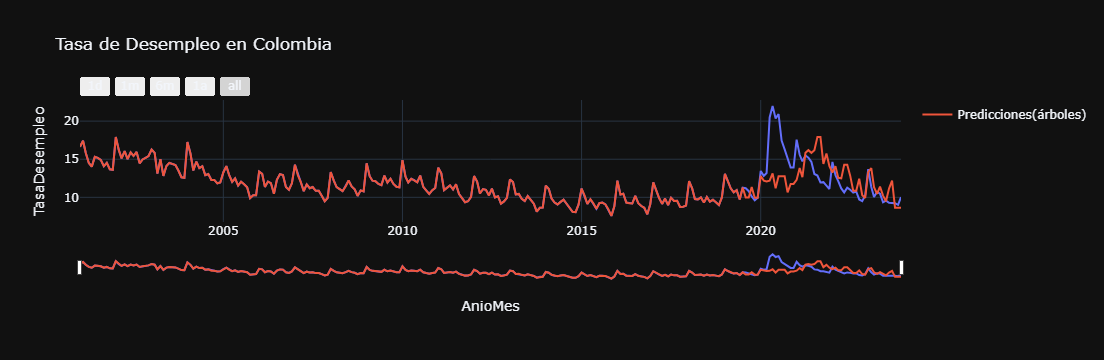

In [40]:
InverArbol2 = pd.Series(pd.Series(np.concatenate([DesempleoTS[::-1][:223].values,test_prediction2]), index=pd.date_range('2001-01-01', periods=276, freq='MS',normalize=True)))#En este caso no hay que hacer nada, simplemente poner los datos originales y las 53 predicciones
fig = px.line(DesempleoTS, y="TasaDesempleo", title="Tasa de Desempleo en Colombia", template='plotly_dark')  # Se le puede quitar el modo oscuro si quiere
fig.add_trace(go.Scatter(x=InverArbol2.index, y=InverArbol2, mode='lines', name='Predicciones(árboles)'))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

El error cuadrático medio de estas predicciones es

In [41]:
sklearn.metrics.mean_squared_error(InverArbol2[-53:].values, DesempleoTS[:53][::-1].values)
((InverArbol2[-53:].values-DesempleoTS[:53][::-1].values)**2).mean()#Manualmente

10.799456131456788

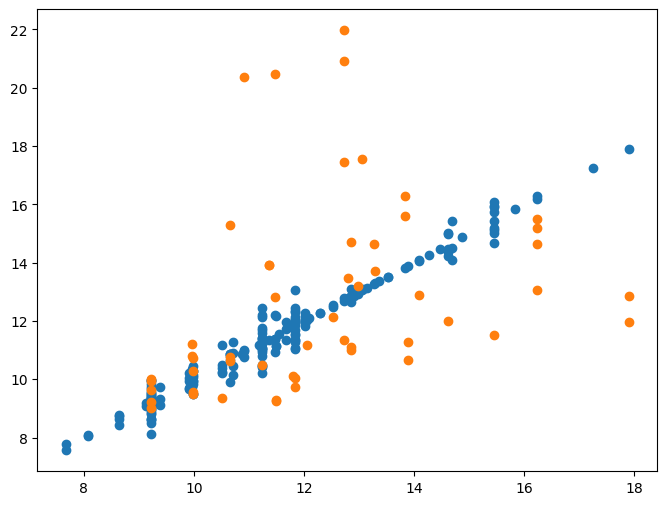

Error cuadrático medio Entrenamiento: 0.1306133730625553
Error cuadrático medio Prueba: 10.743451773230905


In [42]:
# Usando la profundidad 6

decision_tree_Desempleo3 = DecisionTreeRegressor(max_depth=6)  #Creando el árbol con la profundidad anteriormente seleccionada - 6
decision_tree_Desempleo3.fit(X_train_full, y_train_full) #Entrenando el árbol

# Predicción de entrenamiento y test
train_val_prediction3 = decision_tree_Desempleo3.predict(X_train_full)
test_prediction3 = decision_tree_Desempleo3.predict(X_test)

# Gráfico de las predicciones vs los verdaderos(lo ideal sería una recta y=x)
plt.figure(figsize=(8, 6))
plt.scatter(train_val_prediction3, y_train_full, label='train')  # Azul, indican la predicción vs el verdadero valor, pero del entrenamiento
plt.scatter(test_prediction3, y_test, label='test')  # Naranja, , indican la predicción vs el verdadero valor, pero del test
plt.show()
print("Error cuadrático medio Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction3, y_train_full))

print("Error cuadrático medio Prueba:",sklearn.metrics.mean_squared_error(test_prediction3, y_test))

264
264


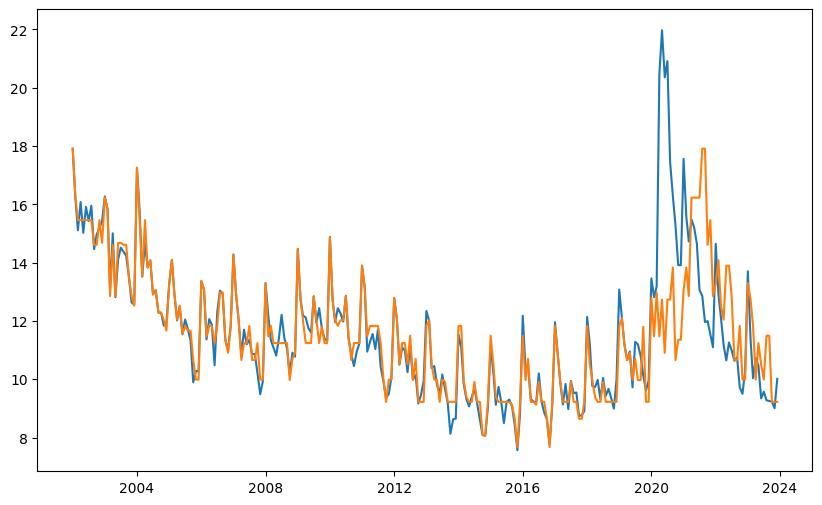

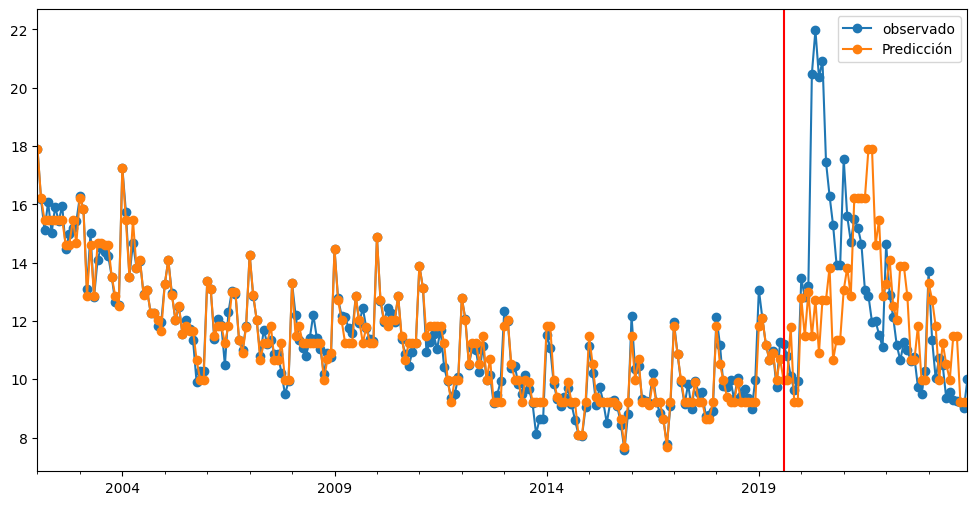

In [43]:
targetjoint2=np.concatenate((y_train_full,y_test))#Uniendo los verdaderos valores entrenamiento-validación con el test
predictionjoint3=np.concatenate((train_val_prediction3,test_prediction3))#Uniendo las presicciones de entrenamiento-validación con test
print(targetjoint2.size)
print(predictionjoint3.size)
d2 = {'observado': targetjoint2, 'Predicción': predictionjoint3}
ObsvsPred2=pd.DataFrame(data=d2,index=indicetrian_val_test2)
ObsvsPred2.head(10)#Recordemos que eliminamos las 12 primeras observaciones porque habían NA cuando organizamos los datos
#Gráfico simple de lo observado y lo predicho
plt.figure(figsize=(10, 6))
plt.plot(ObsvsPred2)
ax = ObsvsPred2.plot( marker="o", figsize=(12,6))
ax.axvline(x=indicetrian_val_test2[211].date(),color='red')

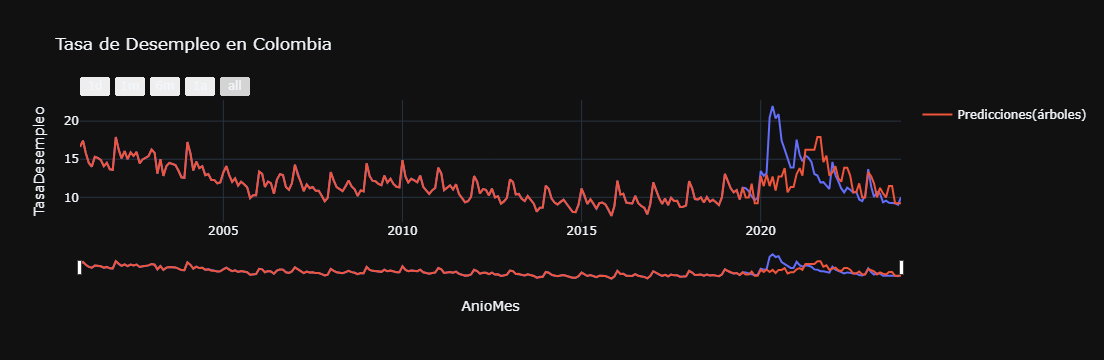

In [44]:
InverArbol3 = pd.Series(pd.Series(np.concatenate([DesempleoTS[::-1][:223].values,test_prediction3]), index=pd.date_range('2001-01-01', periods=276, freq='MS',normalize=True)))#En este caso no hay que hacer nada, simplemente poner los datos originales y las 52 predicciones
fig = px.line(DesempleoTS, y="TasaDesempleo", title="Tasa de Desempleo en Colombia", template='plotly_dark')  # Se le puede quitar el modo oscuro si quiere
fig.add_trace(go.Scatter(x=InverArbol3.index, y=InverArbol3, mode='lines', name='Predicciones(árboles)'))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

In [45]:
sklearn.metrics.mean_squared_error(InverArbol3[-53:].values, DesempleoTS[:53][::-1].values)
((InverArbol3[-53:].values-DesempleoTS[:53][::-1].values)**2).mean()#Manualmente

10.743451773230905